In [1]:
from Forecast_functions import *

In [2]:
import pandas as pd
import itertools
imports(proceed = True)

In [3]:
pd.read_csv('Sales Data.txt')

,Date,ProductCode,Plant,PlantCode,Sales_Channel,Sales_Qty,Sales_Value
0,7/10/2021,7002030,7011,Hyderabad - CFA,CP-GT,-3,-392.19
1,7/10/2021,7002031,7001,Ahmedabad CFA,CP-GT,-17,-3971.90
2,7/10/2021,7002031,7012,Indore CFA,CP-GT,10,2179.89
3,7/10/2021,7002031,7017,Madurai CFA,CP-GT,2,39.60
4,7/10/2021,7002032,7006,Chennai - CFA,CP-GT,-5,-312.87
...,...,...,...,...,...,...,...
7042847,4/13/2023,7001163,7015,Kolkata CFA (PH+AH),AH-GT,560,21940.79
7042848,4/13/2023,7001175,7009,Ghaziabad CFA,CP-GT,72,2713.67
7042849,4/13/2023,7001175,7012,Indore CFA,CP-NMT,72,2571.84
7042850,4/13/2023,7001175,7017,Madurai CFA,CP-GT,432,17094.28


In [4]:
File_path = 'Sales Data.txt'
ProductCodes = [7000158, 7000043, 7000157, 7000022, 7003399]
plants = ['Bangalore New CFA', 'Delhi CFA', 'Zirakpur CFA']
Sales_Channels = ['CP-GT', 'RETAIL', 'CP-NMT']
models = ['arima', 'sarimax', 'rnn']

In [5]:
from Forecast_functions import *

In [6]:
select_df(File_path= 'Sales Data.txt', ProductCode = 7002030, PlantCode= 'Hyderabad - CFA', Sales_Channel='CP-GT', freq = 'B')

C:\Disk D\Forecasting Models\Python Notebooks\Forecast_functions.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample(freq).mean()


,ProductCode,Plant,Sales_Qty,Sales_Value,Dates
Date,,,,,
2020-12-03,7002030.0,7011.0,24.000000,2545.700000,2020-12-03
2020-12-04,7002030.0,7011.0,46.595788,5110.731480,2020-12-04
2020-12-07,7002030.0,7011.0,94.271894,10488.064035,2020-12-07
2020-12-08,7002030.0,7011.0,103.460326,11507.921084,2020-12-08
2020-12-09,7002030.0,7011.0,109.296958,12141.484564,2020-12-09
...,...,...,...,...,...
2023-06-22,7002030.0,7011.0,20.522980,2679.936361,2023-06-22
2023-06-23,7002030.0,7011.0,17.014526,2277.458298,2023-06-23
2023-06-26,7002030.0,7011.0,6.300260,903.916922,2023-06-26


In [7]:
df = select_df(File_path= 'Sales Data.txt', ProductCode = 7002030, PlantCode= 'Hyderabad - CFA', Sales_Channel='CP-GT', freq = 'B')

C:\Disk D\Forecasting Models\Python Notebooks\Forecast_functions.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample(freq).mean()


In [8]:
df.head()

,ProductCode,Plant,Sales_Qty,Sales_Value,Dates
Date,,,,,
2020-12-03,7002030.0,7011.0,24.000000,2545.700000,2020-12-03
2020-12-04,7002030.0,7011.0,46.595788,5110.731480,2020-12-04
2020-12-07,7002030.0,7011.0,94.271894,10488.064035,2020-12-07
2020-12-08,7002030.0,7011.0,103.460326,11507.921084,2020-12-08
2020-12-09,7002030.0,7011.0,109.296958,12141.484564,2020-12-09


ACF is for MA - q, PACF is for AR - p and Trend is for d - p, d, q


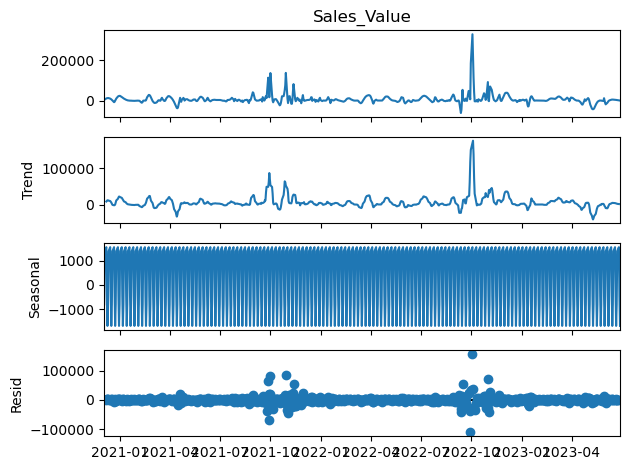

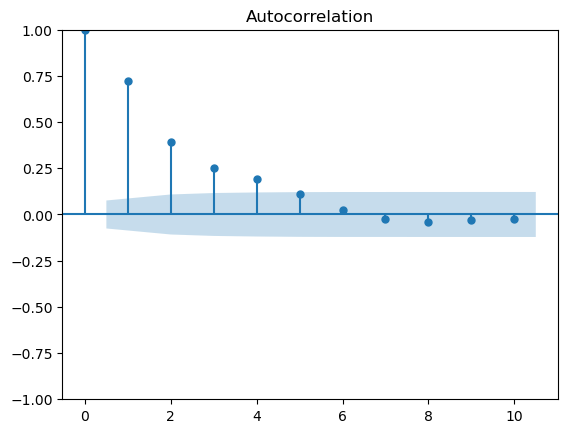

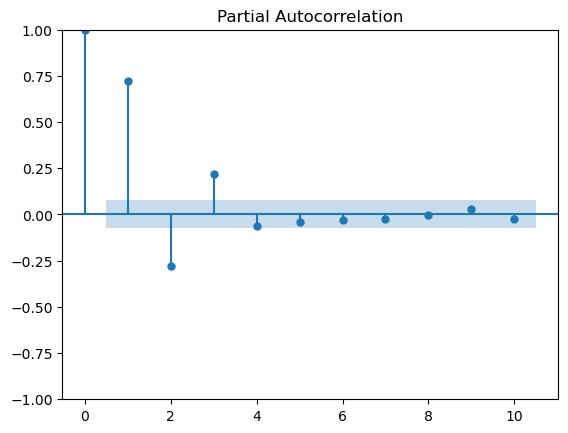

In [10]:
orders(df['Sales_Value'], lags = 10, duration = len(df))

In [11]:
#lag_3 = differencing(df['Sales_Value'], lag = 3)

In [12]:
train, test = train_test_split(df['Sales_Value'], train_size=0.8)

In [13]:
train

Date
2020-12-03     2545.700000
2020-12-04     5110.731480
2020-12-07    10488.064035
2020-12-08    11507.921084
2020-12-09    12141.484564
                  ...     
2022-12-16     -400.520000
2022-12-19     1355.501586
2022-12-20     1972.888513
2022-12-21      497.490371
2022-12-22    -3070.610000
Freq: B, Name: Sales_Value, Length: 536, dtype: float64

In [14]:
test

Date
2022-12-23   -7703.020000
2022-12-26    -133.500000
2022-12-27   -1201.540000
2022-12-28    3054.730000
2022-12-29    -534.020000
                 ...     
2023-06-22    2679.936361
2023-06-23    2277.458298
2023-06-26     903.916922
2023-06-27     390.700733
2023-06-28    -150.200000
Freq: B, Name: Sales_Value, Length: 134, dtype: float64

In [16]:
model = sarimax(train, p = 2, d = 1, q = 4, summary = True, m = 7)

                                      SARIMAX Results                                      
Dep. Variable:                         Sales_Value   No. Observations:                  536
Model:             SARIMAX(2, 1, 4)x(1, 1, [1], 7)   Log Likelihood               -5982.891
Date:                             Wed, 23 Aug 2023   AIC                          11983.782
Time:                                     12:07:54   BIC                          12022.204
Sample:                                 12-03-2020   HQIC                         11998.823
                                      - 12-22-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4749      1.358      0.350      0.727      -2.187       3.136
ar.L2          0.1170      

C:\Users\FQ467WA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
model.predict(start = '2022-12-23', end = '2023-06-28')

2022-12-23    -1145.120724
2022-12-26     4392.439284
2022-12-27     8581.626544
2022-12-28    18115.385885
2022-12-29    21768.072782
                  ...     
2023-06-22    26628.500074
2023-06-23    28952.918263
2023-06-26    26148.163362
2023-06-27    27090.200893
2023-06-28    22632.541164
Freq: B, Name: predicted_mean, Length: 134, dtype: float64

In [18]:
pred = model.predict(start = '2022-12-23', end = '2023-06-28')

Mean Absolute Error:  20986.266409245298
Mean Absolute Percentage Error:  2.1455725618295002e+18
Root Mean Squared Error:  24942.30819664536


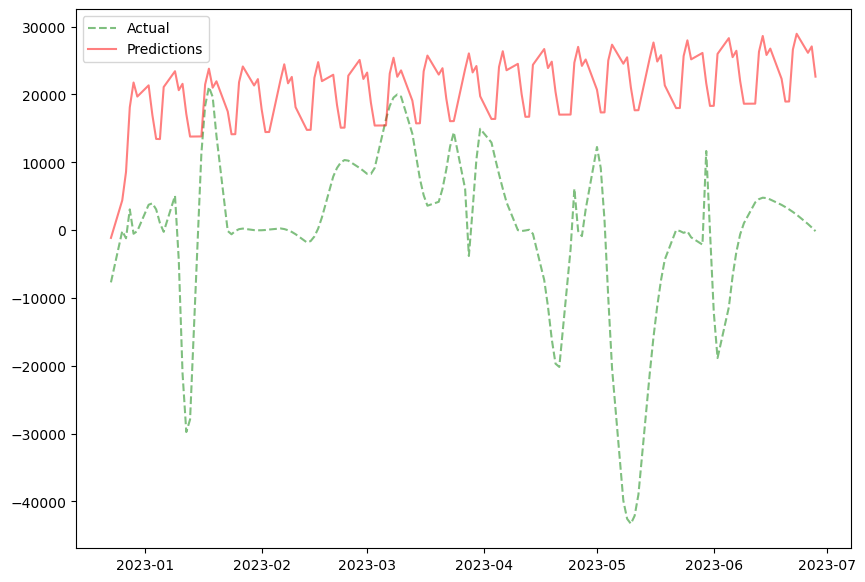

In [19]:
metrics(test, pred)